In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Loading dataset
df=pd.read_csv('Imbalanced_dataset.csv')
df.head()

,Score,Text,review_len
0,4,I liked this product very much. Well made and ...,149
1,2,If you want pumpking flavored coffee buy the T...,557
2,1,I purchased a bag of the blueberry & apple tin...,457
3,2,I was really looking forward to trying the pum...,154
4,4,I like these crackers. I'm trying to cut grai...,504


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Score       50000 non-null  int64 
 1   Text        50000 non-null  object
 2   review_len  50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [4]:
df['Score'].value_counts()

Score
4    15000
3    12500
5    10000
2     7500
1     5000
Name: count, dtype: int64

In [5]:

# nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "tagger"])

# nlp.max_length = 2_000_000
# # Regex patterns
# url_pattern = r"https?://\S+|www\.\S+"
# html_pattern = r"<.*?>"
# emoji_pattern = r"[\U00010000-\U0010ffff]|[\u263a-\U0001f645]"
# special_pattern = r"[^a-zA-Z0-9\s]"

# def clean_basic(text):

#     text = text.lower()

#     text = re.sub(url_pattern, " ", text)

#     text = re.sub(html_pattern, " ", text)

#     text = re.sub(emoji_pattern, " ", text)

#     text = re.sub(special_pattern, " ", text)

#     doc = nlp(text)
#     tokens = [token.lemma_ for token in doc if token.text not in STOP_WORDS and len(token.text) > 1]

#     cleaned = " ".join(tokens)
#     return cleaned


# import re, spacy
# from spacy.lang.en.stop_words import STOP_WORDS

# nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "tagger"])
# nlp.max_length = 2_000_000

# url_re = re.compile(r"https?://\S+|www\.\S+")
# html_re = re.compile(r"<.*?>")
# emoji_re = re.compile(r"[\U00010000-\U0010ffff]|[\u263a-\U0001f645]")
# special_re = re.compile(r"[^a-zA-Z0-9\s]")

# def clean_basic(text):
#     text = text.lower()
#     text = url_re.sub(" ", text)
#     text = html_re.sub(" ", text)
#     text = emoji_re.sub(" ", text)
#     text = special_re.sub(" ", text)

#     doc = nlp(text)
#     return " ".join(
#         token.lemma_ for token in doc
#         if not token.is_stop and token.is_alpha and len(token) > 1
#     )
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop = ENGLISH_STOP_WORDS

url_re = re.compile(r"https?://\S+|www\.\S+")
html_re = re.compile(r"<.*?>")
emoji_re = re.compile(r"[\U00010000-\U0010ffff]|[\u263a-\U0001f645]")
special_re = re.compile(r"[^a-zA-Z0-9\s]")

def clean_basic(text):
    text = text.lower()
    text = url_re.sub(" ", text)
    text = html_re.sub(" ", text)
    text = emoji_re.sub(" ", text)
    text = special_re.sub(" ", text)

    words = text.split()
    words = [w for w in words if w not in stop and len(w) > 1]

    return " ".join(words)



In [6]:
df["cleaned_text"] = df["Text"].apply(clean_basic)

In [7]:
# text = " ".join(df['cleaned_text'].astype(str).tolist())   # if using full dataset
# doc = nlp(text)


In [8]:
# from spacy.lang.en.stop_words import STOP_WORDS
# # stopwords_found = [token.text for token in doc if token.text in STOP_WORDS]
# # print(stopwords_found)

# unique_stops = set([token.text for token in doc if token.text in STOP_WORDS])
# print(unique_stops)
# print(len(unique_stops))   # how many unique stopwords occurred

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

STOPWORDS = ENGLISH_STOP_WORDS

all_text = " ".join(df["cleaned_text"])

words = all_text.split()

unique_stops = {w for w in words if w in STOPWORDS}

# print(unique_stops)
# print(len(unique_stops))


In [9]:
df

,Score,Text,review_len,cleaned_text
0,4,I liked this product very much. Well made and ...,149,liked product strong store extra cups real spa...
1,2,If you want pumpking flavored coffee buy the T...,557,want pumpking flavored coffee buy timothys per...
2,1,I purchased a bag of the blueberry & apple tin...,457,purchased bag blueberry apple tiny fruits exci...
3,2,I was really looking forward to trying the pum...,154,really looking forward trying pumpkin flavor l...
4,4,I like these crackers. I'm trying to cut grai...,504,like crackers trying cut grain diet miss occas...
...,...,...,...,...
49995,2,"Thought I'd got a bad first batch, so somehow ...",355,thought got bad batch drank shipment gave away...
49996,5,Worth the price and trouble of buying them. Ev...,221,worth price trouble buying diabetic help sugar...
49997,4,The taste of this was like a pop but it was ve...,167,taste like pop refreshing mouth liked healthie...
49998,1,"As with any food product, your opinion may dif...",470,food product opinion differ meal short flavor ...


In [10]:
# filtering words
def filter_review(text, min_words=3, max_words=250):
    words = text.split()

    if len(words) < min_words:
        return False
    if len(words) > max_words:
        return False
    
    return True


In [11]:
# df_original = df.copy()
df_filtered_imb = df[df["cleaned_text"].apply(filter_review)]


In [12]:
df_filtered_imb

,Score,Text,review_len,cleaned_text
0,4,I liked this product very much. Well made and ...,149,liked product strong store extra cups real spa...
1,2,If you want pumpking flavored coffee buy the T...,557,want pumpking flavored coffee buy timothys per...
2,1,I purchased a bag of the blueberry & apple tin...,457,purchased bag blueberry apple tiny fruits exci...
3,2,I was really looking forward to trying the pum...,154,really looking forward trying pumpkin flavor l...
4,4,I like these crackers. I'm trying to cut grai...,504,like crackers trying cut grain diet miss occas...
...,...,...,...,...
49995,2,"Thought I'd got a bad first batch, so somehow ...",355,thought got bad batch drank shipment gave away...
49996,5,Worth the price and trouble of buying them. Ev...,221,worth price trouble buying diabetic help sugar...
49997,4,The taste of this was like a pop but it was ve...,167,taste like pop refreshing mouth liked healthie...
49998,1,"As with any food product, your opinion may dif...",470,food product opinion differ meal short flavor ...


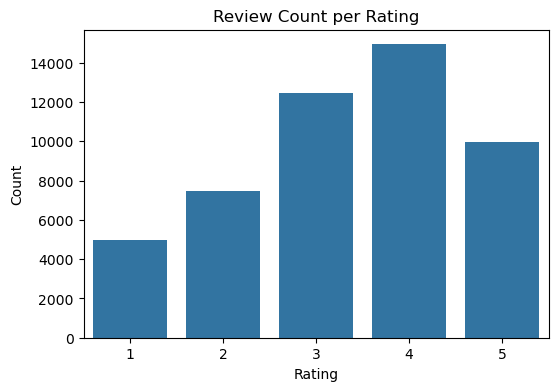

In [13]:
# visualization
# bar plot
plt.figure(figsize=(6,4))
sns.countplot(x="Score", data=df_filtered_imb)
plt.title("Review Count per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

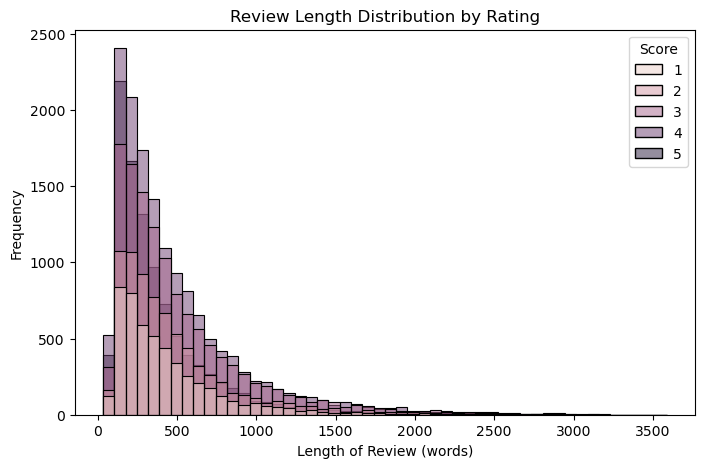

In [14]:
#Histogram: Word Count Distribution by Rating
plt.figure(figsize=(8,5))
sns.histplot(data=df_filtered_imb, x="review_len", hue="Score", bins=50)
plt.title("Review Length Distribution by Rating")
plt.xlabel("Length of Review (words)")
plt.ylabel("Frequency")
plt.show()

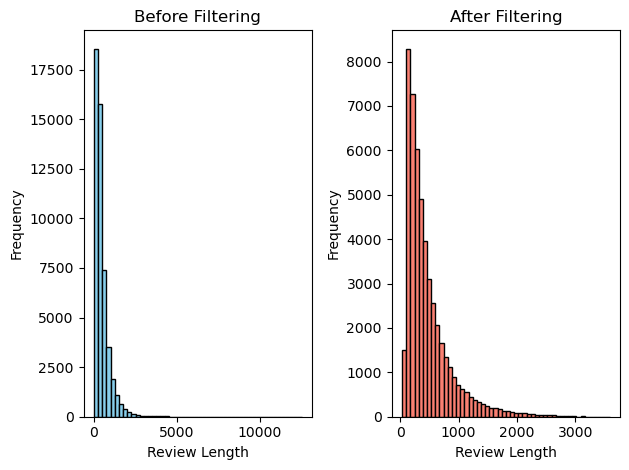

In [15]:
plt.subplot(1,2,1)
plt.hist(df['review_len'], bins=50, color='skyblue', edgecolor='black')
plt.title("Before Filtering")
plt.xlabel("Review Length")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(df_filtered_imb['review_len'], bins=50, color='salmon', edgecolor='black')
plt.title("After Filtering")
plt.xlabel("Review Length")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [16]:
#Display 3–10 Sample Reviews per Rating
def show_samples(df, n=5):
    for rating in sorted(df_filtered_imb["Score"].unique()):
        print("\n" + "="*40)
        print(f"Rating: {rating} | Showing {n} sample reviews")
        print("="*40)
        
        samples = df[df["Score"] == rating].sample(n, random_state=42)
        
        for i, row in samples.iterrows():
            print(f"\nReview {i}:")
            print(row["cleaned_text"])  


In [17]:
show_samples(df_filtered_imb, n=10)



Rating: 1 | Showing 10 sample reviews

Review 11160:
big disappoint cat toy literally just big piece cardboard like described amazon cat turned catnip placed opening interested good thing catnip ite went trash ripoff

Review 37053:
said yukkk guess black currant tried guess tried liked black currant flavor vanilla sure like tea

Review 10282:
orderd tons company cut costs watered tastes like regular cranberry juice used love pure taste health benefits false advertizing 100 percent juice water

Review 20464:
purchased pack opened taste rancid use nut butters time disappointed stay cashew butter sent company efficient deal

Review 13435:
live southern california yard run gophers bought trap amazon supposedly meant novice users just beginning gopher eradication journey trap arrived paper box pretty useful instruction placing trap place trap direction tunnel cover end hole opening place bait wear gloves joint trap tunnel air tight use main run used lateral openings help items instructions

In [18]:
df_filtered_imb['Score'].value_counts()


Score
4    14933
3    12449
5     9969
2     7473
1     4982
Name: count, dtype: int64

In [19]:
x = df_filtered_imb['Text']   #(f)
y = df_filtered_imb['Score']  #(t)
x.head()

0    I liked this product very much. Well made and ...
1    If you want pumpking flavored coffee buy the T...
2    I purchased a bag of the blueberry & apple tin...
3    I was really looking forward to trying the pum...
4    I like these crackers.  I'm trying to cut grai...
Name: Text, dtype: object

In [20]:
y.head()

0    4
1    2
2    1
3    2
4    4
Name: Score, dtype: int64

In [21]:
# Splitting into Train and Test
from sklearn.model_selection import train_test_split
x_train_imbalanced , x_test_imbalanced , y_train_imbalanced , y_test_imbalanced = train_test_split(x, y,test_size=0.30,random_state=42,stratify=y)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
x_train_vect = vectorizer.fit_transform(x_train_imbalanced)
x_test_vect = vectorizer.transform(x_test_imbalanced)
# import joblib

# vectorizer = joblib.load("tfidf.pkl") 
# x_train_vect = vectorizer.transform(x_train_imbalanced)
# x_test_vect = vectorizer.transform(x_test_imbalanced)



In [23]:
# import joblib
# joblib.dump(vectorizer, "tfidf.pkl")

In [24]:
print("Training data shape:", x_train_vect.shape)
print("Test data shape:", x_test_vect.shape)


Training data shape: (34864, 20000)
Test data shape: (14942, 20000)


# Logistic Regression


In [25]:

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(
    class_weight='balanced',
    C=0.5,
    solver='lbfgs',
    max_iter=2000
)
logit.fit(x_train_vect,y_train_imbalanced)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=2000)

In [26]:
y_pred_train = logit.predict(x_train_vect)
y_pred_test = logit.predict(x_test_vect)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("train:",accuracy_score(y_train_imbalanced,y_pred_train))
print("test:",accuracy_score(y_test_imbalanced,y_pred_test))

train: 0.6749082147774208
test: 0.5119796546647035


In [28]:
print("train:",classification_report(y_train_imbalanced,y_pred_train))
print("test:",classification_report(y_test_imbalanced,y_pred_test))

train:               precision    recall  f1-score   support

           1       0.61      0.86      0.72      3488
           2       0.64      0.67      0.66      5231
           3       0.69      0.61      0.65      8714
           4       0.73      0.58      0.65     10453
           5       0.66      0.81      0.73      6978

    accuracy                           0.67     34864
   macro avg       0.67      0.71      0.68     34864
weighted avg       0.68      0.67      0.67     34864

test:               precision    recall  f1-score   support

           1       0.44      0.65      0.53      1494
           2       0.39      0.40      0.39      2242
           3       0.51      0.43      0.47      3735
           4       0.57      0.46      0.51      4480
           5       0.56      0.70      0.63      2991

    accuracy                           0.51     14942
   macro avg       0.50      0.53      0.51     14942
weighted avg       0.52      0.51      0.51     14942



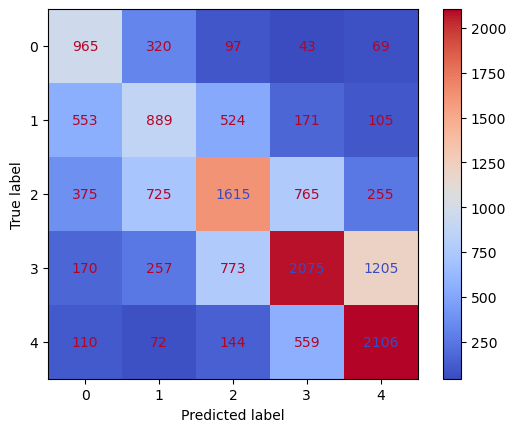

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_test_imbalanced,y_pred_test))
c_matrix.plot(cmap = plt.cm.coolwarm)
plt.show()

# Randomforest

In [30]:


from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1)
rf.fit(x_train_vect,y_train_imbalanced)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

In [31]:
y_pred_train_1 = rf.predict(x_train_vect)
y_pred_test_1 = rf.predict(x_test_vect)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("train:",accuracy_score(y_train_imbalanced,y_pred_train_1))
print("test:",accuracy_score(y_test_imbalanced,y_pred_test_1))

train: 0.999913951353832
test: 0.45870700040155266


In [33]:
print("train:",classification_report(y_train_imbalanced,y_pred_train_1))
print("test:",classification_report(y_test_imbalanced,y_pred_test_1))

train:               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3488
           2       1.00      1.00      1.00      5231
           3       1.00      1.00      1.00      8714
           4       1.00      1.00      1.00     10453
           5       1.00      1.00      1.00      6978

    accuracy                           1.00     34864
   macro avg       1.00      1.00      1.00     34864
weighted avg       1.00      1.00      1.00     34864

test:               precision    recall  f1-score   support

           1       0.67      0.29      0.40      1494
           2       0.47      0.08      0.14      2242
           3       0.42      0.51      0.46      3735
           4       0.43      0.64      0.51      4480
           5       0.56      0.50      0.53      2991

    accuracy                           0.46     14942
   macro avg       0.51      0.40      0.41     14942
weighted avg       0.48      0.46      0.43     14942



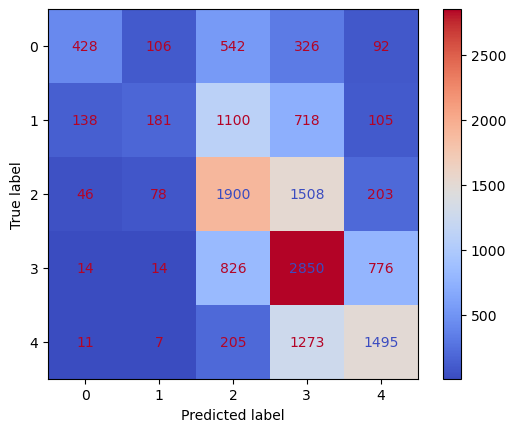

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_test_imbalanced,y_pred_test_1))
c_matrix.plot(cmap = plt.cm.coolwarm)
plt.show()

# SVM

In [35]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC(class_weight='balanced')

svm_model.fit(x_train_vect, y_train_imbalanced)

y_pred_svm = svm_model.predict(x_test_vect)

print("Accuracy:", accuracy_score(y_test_imbalanced, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_imbalanced, y_pred_svm))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Accuracy: 0.4844063713023692

Classification Report:
               precision    recall  f1-score   support

           1       0.46      0.53      0.49      1494
           2       0.36      0.37      0.37      2242
           3       0.46      0.43      0.44      3735
           4       0.52      0.48      0.50      4480
           5       0.55      0.62      0.59      2991

    accuracy                           0.48     14942
   macro avg       0.47      0.49      0.48     14942
weighted avg       0.48      0.48      0.48     14942



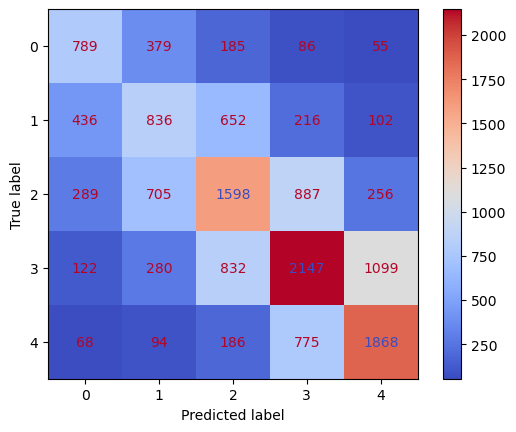

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_test_imbalanced,y_pred_svm))
c_matrix.plot(cmap = plt.cm.coolwarm)
plt.show()

# naive bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_vect, y_train_imbalanced)

# Predictions
y_pred_train_nb = nb.predict(x_train_vect)
y_pred_test_nb = nb.predict(x_test_vect)

# Accuracy
print("Train Accuracy:", accuracy_score(y_train_imbalanced, y_pred_train_nb))
print("Test Accuracy:", accuracy_score(y_test_imbalanced, y_pred_test_nb))

# Classification Report
print("\nClassification Report (Train):\n")
print(classification_report(y_train_imbalanced, y_pred_train_nb))

print("\nClassification Report (Test):\n")
print(classification_report(y_test_imbalanced, y_pred_test_nb))



Train Accuracy: 0.5933627810922442
Test Accuracy: 0.4773122741266229

Classification Report (Train):

              precision    recall  f1-score   support

           1       0.87      0.29      0.44      3488
           2       0.71      0.21      0.32      5231
           3       0.53      0.69      0.60      8714
           4       0.56      0.82      0.66     10453
           5       0.75      0.57      0.65      6978

    accuracy                           0.59     34864
   macro avg       0.68      0.52      0.53     34864
weighted avg       0.64      0.59      0.57     34864


Classification Report (Test):

              precision    recall  f1-score   support

           1       0.74      0.19      0.30      1494
           2       0.41      0.10      0.15      2242
           3       0.42      0.54      0.47      3735
           4       0.46      0.74      0.57      4480
           5       0.64      0.44      0.52      2991

    accuracy                           0.48     149

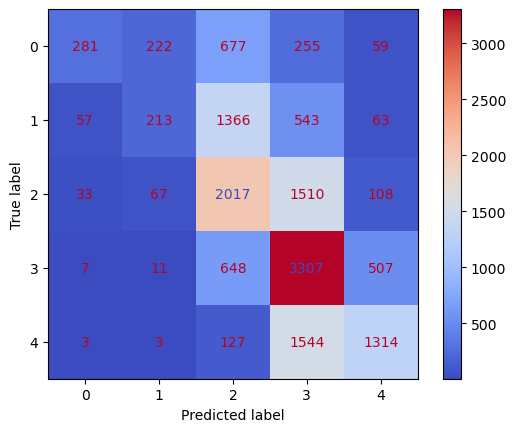

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_test_imbalanced,y_pred_test_nb))
c_matrix.plot(cmap = plt.cm.coolwarm)
plt.show()

# saving the model

In [39]:
# import joblib

# joblib.dump(logit, "Model_B.pkl")  
from joblib import dump

dump(logit, "Model_B.pkl")
print("Model_B (imbalanced) saved")


Model_B (imbalanced) saved


# saving tfidf

In [40]:
from joblib import dump
dump(vectorizer, "tfidf_B.pkl")
print("TF-IDF saved successfully")


TF-IDF saved successfully


In [41]:
# df_filtered_imb.to_csv(
#     "imbalanced_dataset_final.csv",
#     index=False
# )


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": (
        LogisticRegression(
            max_iter=1000,
            random_state=42,
            class_weight='balanced'
        ),
        {
            "C": [0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["liblinear"]
        }
    ),

    "Linear SVM": (
        LinearSVC(
            class_weight='balanced',
            random_state=42
        ),
        {
            "C": [0.1, 1, 10]
        }
    ),

    "Random Forest": (
        RandomForestClassifier(
            random_state=42,
            n_jobs=2,
            class_weight='balanced'
        ),
        {
           
           "n_estimators": [200, 400],
           "max_depth": [20, 40],
           "min_samples_split": [2, 10],
           "min_samples_leaf": [1, 5]
}
        
    ),

    "Naive Bayes": (
        MultinomialNB(),
        {
            "alpha": [0.1, 0.5, 1.0]
        }
    )
}

results = {}

for name, (model, params) in models.items():
    print(f"\n Training {name}:")

    grid = GridSearchCV(
        model,
        params,
        cv=3,
        scoring="f1_macro",
        n_jobs=2
    )

    grid.fit(x_train_vect, y_train_imbalanced)

    y_pred = grid.best_estimator_.predict(x_test_vect)
    acc = accuracy_score(y_test_imbalanced, y_pred)

    results[name] = {
        "Best Params": grid.best_params_,
        "Best CV F1": grid.best_score_,
        "Test Accuracy": acc
    }

    # print("Best Params:", grid.best_params_)
    print("Best CV F1:", grid.best_score_)
    print("Test Accuracy:", acc)




 Training Logistic Regression:
Best CV F1: 0.5014434629378425
Test Accuracy: 0.5206799625217507

 Training Linear SVM:
Best CV F1: 0.49693545115723836
Test Accuracy: 0.5170659884888235

 Training Random Forest:
Best CV F1: 0.4486559006102279
Test Accuracy: 0.4596439566323116

 Training Naive Bayes:
Best CV F1: 0.45554849674453557
Test Accuracy: 0.5085664569669388
